In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
from sklearn.utils import shuffle

DATADIR = 'F:/crack_dataset'
IMG_SIZE = 50
CATEGORIES = ['negative', 'posetive']
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(
                path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])


create_training_data()

training_data = shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


X = np.array(X)/255.0
y = np.array(y)
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.int32)

In [29]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="BinaryCrossentropy",
              optimizer='adam',
              metrics=['accuracy'])
import os
checkpoint_path = "./keras/tt/"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only = True,
                                                 verbose=0,
                                                 mode = 'max',
                                                 patience=6,
                                                 monitor='val_accuracy'    
                                                )
history = model.fit(X, y, batch_size=32, epochs=15, validation_split=0.2, callbacks=[cp_callback])

Epoch 1/15
48/48 [==============================] - 16s 332ms/step - loss: 0.5420 - accuracy: 0.7495 - val_loss: 0.1584 - val_accuracy: 0.9318
Epoch 2/15
48/48 [==============================] - 15s 318ms/step - loss: 0.1161 - accuracy: 0.9586 - val_loss: 0.0802 - val_accuracy: 0.9685
Epoch 3/15
48/48 [==============================] - 14s 297ms/step - loss: 0.0843 - accuracy: 0.9704 - val_loss: 0.0911 - val_accuracy: 0.9633
Epoch 4/15
48/48 [==============================] - 16s 330ms/step - loss: 0.2316 - accuracy: 0.9132 - val_loss: 0.1430 - val_accuracy: 0.9738
Epoch 5/15
48/48 [==============================] - 16s 330ms/step - loss: 0.2479 - accuracy: 0.9323 - val_loss: 0.0992 - val_accuracy: 0.9738
Epoch 6/15
48/48 [==============================] - 17s 347ms/step - loss: 0.2326 - accuracy: 0.9132 - val_loss: 0.2477 - val_accuracy: 0.9475
Epoch 7/15
48/48 [==============================] - 16s 344ms/step - loss: 0.2377 - accuracy: 0.9362 - val_loss: 0.3887 - val_accuracy: 0.8661

In [30]:
model.load_weights(checkpoint_path)

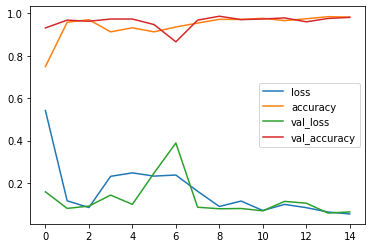

In [37]:
df = pd.DataFrame(history.history)
epoch = [x for x in range(1,16)]
df.plot();

In [33]:
def predict_image(image_path):
    img_array=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X = np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    X = np.array(X)/255.0
    predict = model.predict(X, batch_size=None, verbose=0, steps=None)[0][0]
    prediction = tf.math.round(predict, name=None) 
    if prediction == 1:
        return "crack"
    else:
        return  "no crack"

In [38]:
predict_image("F:/crack dataset/posetive/07718.jpg")

'crack'